### Idea 
#### search for songs that contain the name of the 5 biggest cities in each state
- Get the list of the 5 biggest cities from each state (wikipedia)
- search for occurences of the city name in the lyrics of songs (lyrics.com)
- clean up the table

In [1]:
from requests import get
import glob
import pandas as pd
from bs4 import BeautifulSoup
import re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from time import sleep
from random import randint

In [2]:
response = get("https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population")
html_soup = BeautifulSoup(response.text, 'html.parser')
states = html_soup.find_all("tr")

In [3]:
names_states =[]
names_cities =[]

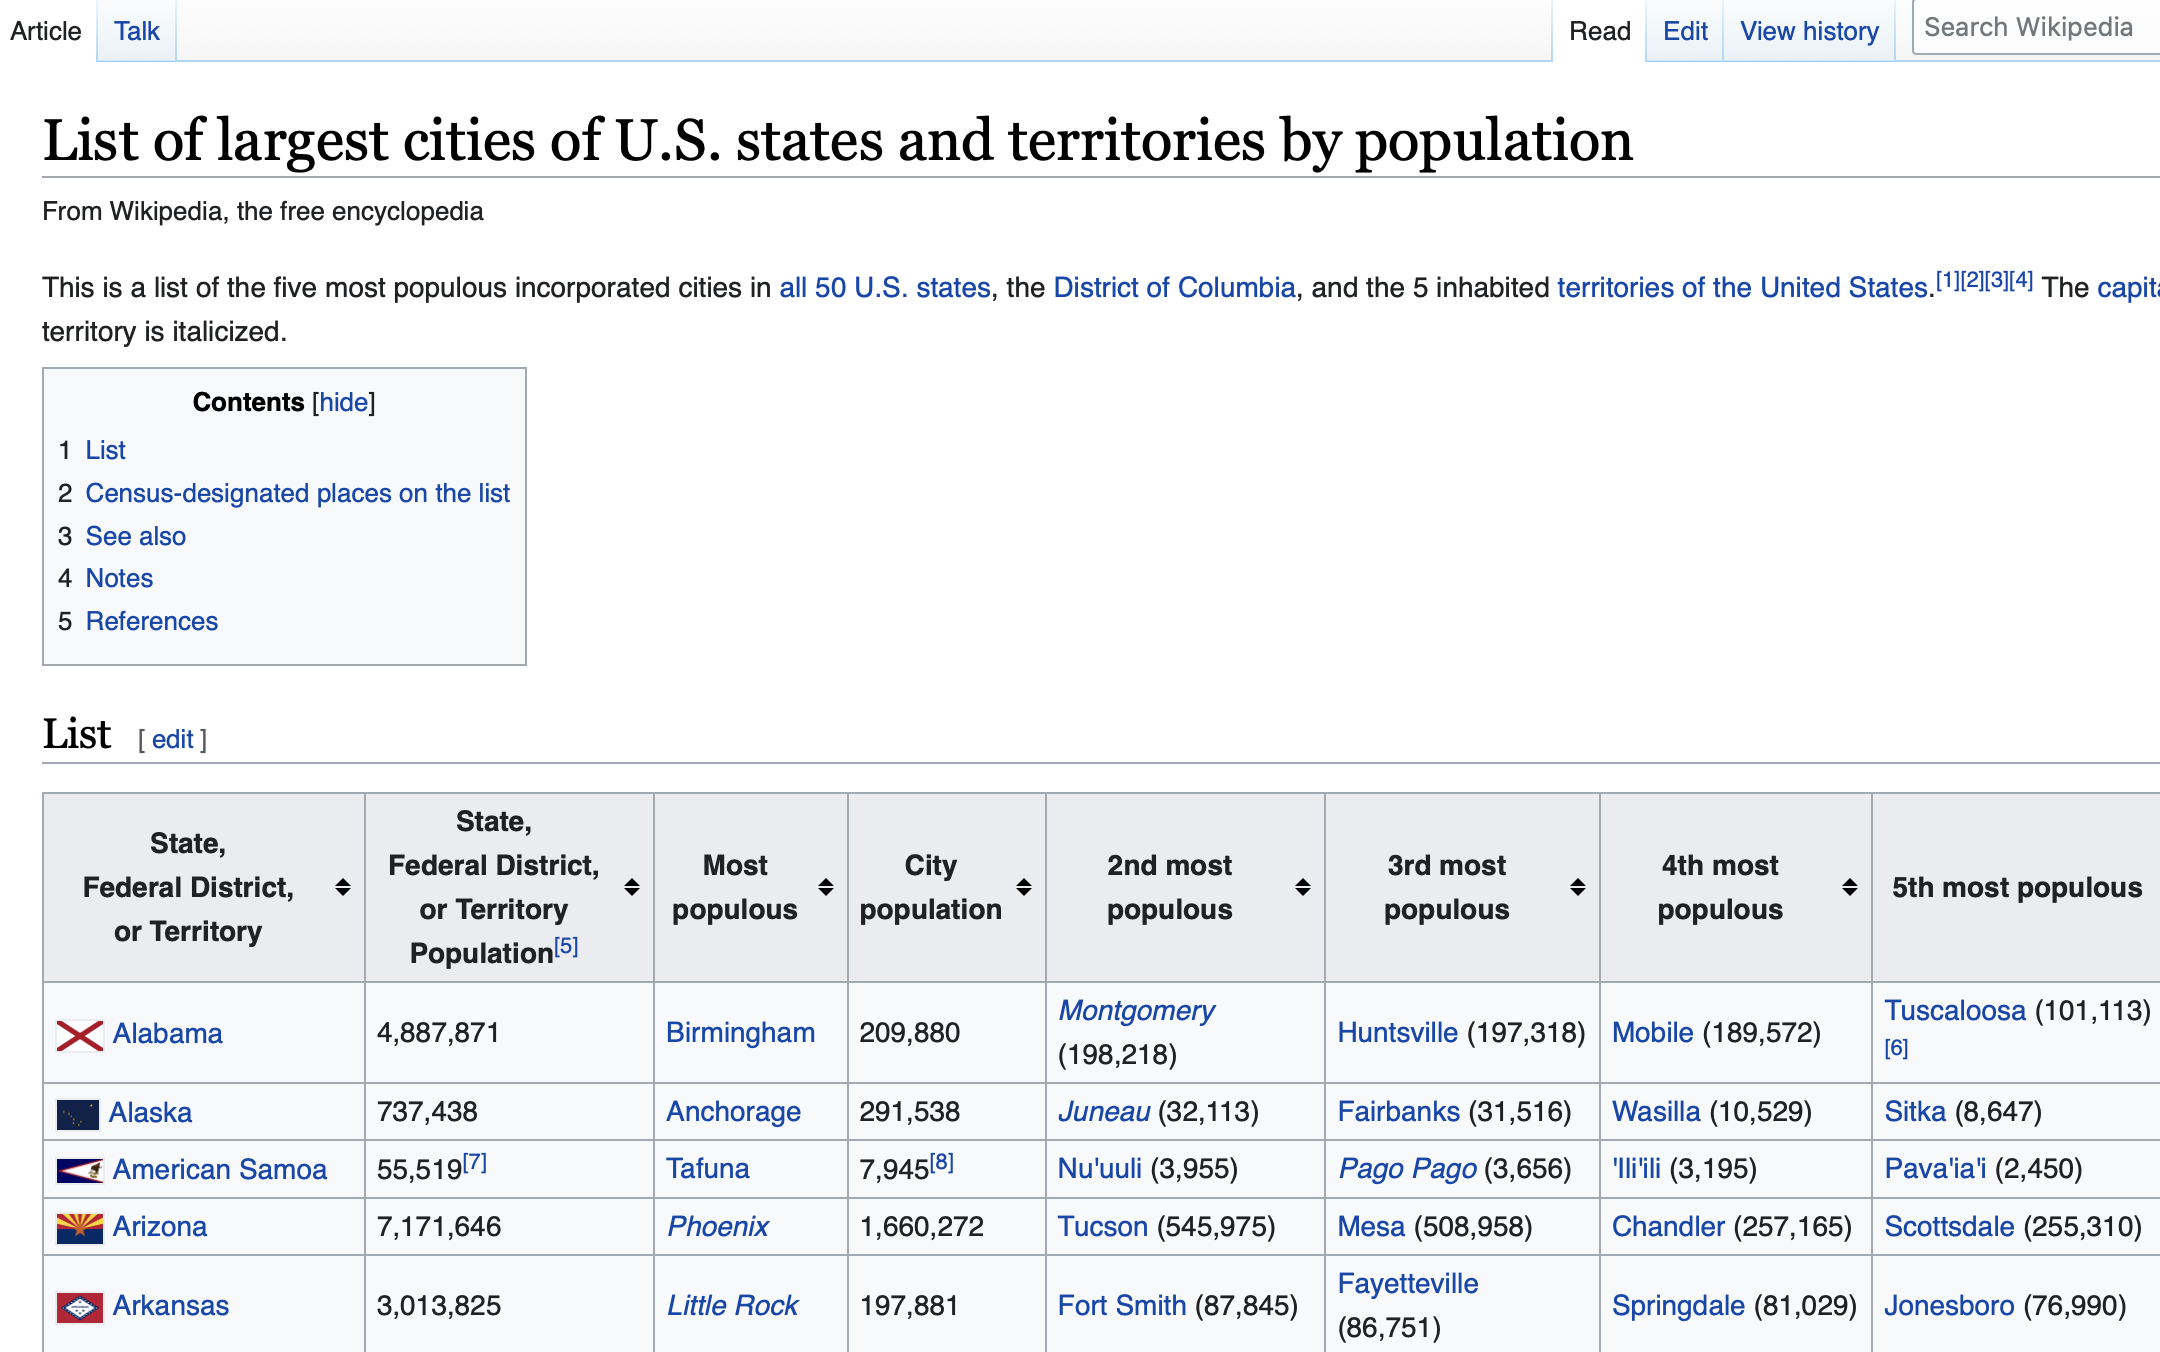

In [4]:
for state in states[1:57]:
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[0].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[2].text.strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[4].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[5].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[6].text.split("(")[0].strip())
    
    names_states.append(state.find_all("td")[0].text.strip())
    names_cities.append(state.find_all("td")[7].text.split("(")[0].strip())
    
    if len(state.find_all("td")[-1])>=3:
        names_states.append(state.find_all("td")[0].text.strip())
        names_cities.append(state.find_all("td")[-1].text.split("(")[0].strip())
    

In [5]:
song_city = []
song_state = []
song_name =[]
song_artist =[]
curr_state = names_states[0]

In [8]:
def song_name_scraper(city,state):
    response = get("https://www.lyrics.com/lyrics/"+city)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    if len(html_soup.find_all("div",class_ ="pager"))>0:
        number_pages = int(html_soup.find_all("div",class_ ="pager")[-1].find_all("a")[-1].text)
    else:
        number_pages=1
    
    for page_no in range(1,number_pages+1):
        response = get("https://www.lyrics.com/lyrics/"+city+"&p="+str(page_no))
        html_soup = BeautifulSoup(response.text, 'html.parser')
        page = html_soup.find_all("div",class_ ="lyric-meta within-lyrics")
        for entry in page:
            print(entry.find_all("p")[0].text)
            song_city.append(city)
            song_state.append(state)
            song_name.append(entry.find_all("p")[0].text)
            song_artist.append(entry.find_all("p")[1].text)

        sleep(randint(1,2))

In [ ]:
for count,city in enumerate(names_cities[282:294]):
    state = names_states[count]
    if state!=curr_state:
        data = pd.DataFrame({"song_city":song_city,
              "song_state":song_state,
             "song_artist":song_artist,
              "song_name":song_name
             })
        data.to_csv("./datasets/"+str(curr_state)+".csv")
        curr_state = state
        song_city = []
        song_state = []
        song_name =[]
        song_artist =[]

    
    song_name_scraper(city,state)


That's Right (You're Not from Texas)
That's Right (You're Not fromTexas)
Gonna Build A Big Fence Around Texas
Screw You, We're From Texas [Live at American Airlines Center]
Boogie Back to Texas
Texas Love
Cup Up Top Down
Yellow Rose of Texas/The Eyes of Texas
Screw You, We're From Texas
Yellow Rose of Texas
Boogie Back to Texas
Texas Playboy Rag
The Girls From Texas
Hello Texas
Texas Strut
Moving On
The Girls from Texas
The Girls from Texas
Take Me to Texas
Lone Star Blues
Don't Mess Wit Texas
Texas
I've Got Texas in My Heart
Texas in My Soul
Dance Time in Texas
Don't Mess Wit Texas
Keep Texas Beautiful
Texas Sun
Stupid Texas Song
Gone to Texas
Texas Takeover
Texas (When I Die)
Texas (When I Die)
All My Ex's Live in Texas
Texas on a Saturday Night
There's a Little Bit of Everything in Texas
A State of Texas
There's a Girl in Texas [DVD]
There's a Girl in Texas
All My Exes Live in Texas (as used in the film Cold Comfort Manor)
Long Tall Texan
Deep in the Heart of Texas
Long, Tall Texan


5, 500 Miles
Texas Is Bigger Than It Used to Be [8 Seconds]
East Texas Pines
Borracho Grande
Panhandle Poorboy
Texas
Texas, 1947
Talk to Me Texas
Strawberry Flats
Ohio (Come Back to Texas)
Palestine Texas
Texas Size Heartache
I Blew Up The United States
Dixie Flyer
Imaginos
Stars over Texas
Little Red Rodeo
Sweet Little Sixteen
Everyday
God Blessed Texas
Sequestered in Memphis
Little Joe the Wrangler
Ohio (Come Back to Texas)
Texas Eagle
40 Acres
El  Paso
The Front Porch Song
Draped Up
Dixie Flyer
Wild & Lonesome
Red White Blue Jean American Dream
Intro
Texas Cries
Intro
El Paso
Sweet Little Sixteen
Paris, Texas
Plastic Jesus
Plastic Jesus
Out Here
Best Friend
What I Like About Texas
Little Joe, the Wrangler
The Eyes of Texas
West Texas Highway
She Sells Sanctuary
Yellow Rose of Texas
All Things Considered
A Stolen Car
I'd Like to Be in Texas
What U Movin
Beer for Breakfast
Cowboy Guilt
Skip to My Lou
Beers, Steers and Queers
Everyday
Texas
Fence Post
Candayapple
Little Red Rodeo
Check

Bun
Pourin' Up
Knockin Doorz Down
Ten Years Pass
Pourin' Up [Obscene Blend]
California Country Boy
Crazed Country Rebel
Vaquero
Nashville
Choctaw Bingo
No Sign of Rain
Little Texas Shaker
Sippin' tha Barre
Turn It Up
Turn It Up
Great Divide
Starched & Cleaned
She Builds Quick Machines
Knockin Doors Down
Long Hauls and Close Calls
H8 Line
Long Hauls and Close Calls
She Builds Quick Machines
They Killed John Henry
Welcome 2 Houston
Cowboy Way
Snow Money
Süße kleine Sechszehn (Sweet little sixteen)
He Don't Play Nothin' But the Blues
Beto Molina
Street Life
Street Life
Murder
Talkin That Talk
Street Life
Pourin' Up
Knockin Doors Down
Pourin' Up
Back to New Orleans
Bad as Hell
Talkin That Talk
Connect
Red Sky
Don't You Know
Big Tex's Girl
Valley
Baller in the Mix
7-1-3
The Way We Ball
Dallas to Houston
Z-Ro
Untitled Track
Swang
Southside
Switch Styles
Prairie Rose
Torn Between Suicide & Breakfast
Born and Raised in Black and White
Don't Drink the Milk
Jackalope
Like What I Got
Outtapocket 

Kitty Kat [Homecoming Live]
Flawless / Feeling Myself [Homecoming Live]
Empire State of Mind
The Last Cowboy Song
Santa Ana
(We're Not) the Jet Set
Sweet Melinda
There Dey Go
Guitar Town
The Gulf of Mexico
Somebody Turned on the Light
Tha Shiznit
Cloud of Dust
Blondes (Have More Fun)
Xxplosive
Housewife
Big Pimpin'
Lost My Driving Wheel [Previously Unreleased Track; Bonus Track]
Doin' What Comes Natur'lly
Hustlin'
Homicide
Don't Let My Baby Ride
Xxplosive
Housewife
Skip to My Lou
There Once Was a Man
Dogie's Lament
Somos Más Americanos
My Summer Vacation
No, No, No [Camdino Soul Extended Remix; Bonus Track]
Dead Babies
There Once Was a Man
My Elusive Dreams
Beer for My Horses
Look at Me
Look at Me
Once I Had a Woman
Waiting for a Train [Live]
I've Loved You All Over the World
Playboys of the Southwestern World
Diamond Joe
To Washington
Red White and Blue
People Get Up and Drive Your Funky Soul [Remix; Previously Unreleased Track]
Bushleaguer [Album Version]
Bezzle
Do Re Mi
My Elusive D

B Movie Boxcar Blues
Good Girl Gone Bad
Colorado Girl
It's What I Am
(Take Me Back To) My Boots and Saddle
Clap Yo Hands
Muffin Man
In Which I Finally Admit That I Won World War II Single-Handed
Break Up the Concrete
A Castle Full of Rascals
Boll Weevil
Houston Don't Dream About Me [Live]
Can't Cry Anymore [Video; Alternate Take]
Shticks and Stones
A  Film Called (Pimp)
Southside
Muffin Man
Southside
Be My Lady
Playaz Club
Boll Weevil
Boll Weevil
Lizzy and the Rainman
If That Ain't Country
A Moment in the Sun Interlude
Slow Burn
I'm Going Big Time
Poke Chop Sandwich
Beatbox
Country Girl
Murder
God Bless the USA
Murder
Get Crunk
Can't Cry Anymore
Blackmail
Down South Funk
What Kind of Girl?
John Riley
Check 1, 2
Sister
All Hat, No Cattle
When the Night Comes Falling from the Sky
Lines Around Your Eyes
Inca Roads
Check 1, 2
Everything Is Different Now
Thug Angels
Here's Your Sign (Get the Picture)
Because I Got It Like That
Amarillo
Good Time
Canto del Bracero
No Idea's Original [Origina

Nighthawk Postcards
Living in the Band
Rolling By
My Baby Thinks She's French
Screaming Blue Jillions [Bonus Track]
Beat Box
Lighters Up
Rednecks
Living a Lie
Half-Assed
Living a Lie
Hard Luck Saint
Money Make the World Go Round
When the Night Comes Falling from the Sky
Make It Back to Memphis
Timing X/Space Junk
Caraphernelia
I'm Gone
SpeakEasy
If I Could Buy Me Some Time
I Feel
Some Humans Ain't Human
Clay Pigeons
The Once and Future Carpenter
Texas
Music City USA
8 Jours A El Paso
Southern Drawl
My One
Pistol Packin' Mama
Los Traficantes
Cloudy-Eyed Stroll [Remix]
Migrant
The Boll Weevil
Streets of Laredo
Honky Tonkin' Around Texas
At the Time
Smile
Can't Cry Anymore [Live in Madrid]
Free Ride [Live]
Smile
Get Crunk [Remix]
Pimp Mode
Truck Drivin' Man
Get Crunk
Can't Fade Me
Machete Reloaded
Yay Yay
Good Ass Intro
FDT, Pt. 2
Guilty
W Y O (What You On)
Candy Paint
Leather In the Rain
Drogas
I Ain't Living Long Like This [Live]
Roll on Big Mama
Drivin' Blind
Forecast
From Here to King

Throw Ya City Up
Brother 52
Raise the Roof
Love Needs a Fool
Choppin up That Paper
Show Me Luv
In My Nature
Woof Woof
Runaway Love
The Borderline
Ice Age
I'm a Soldier
Boyz N Blue
The Story
Retaliation Is a Must
Juke Joint Jumping
Electric Rodeo
New Zip Code
One Empty Cot in the Bunkhouse
Purple Rain
From the South
Here Lately
Scandalous Bitches
Ballin' Is a Habit
Roun' the Globe
Lac Dogs & Hogs
Gone Like Rain
Bells of Creation
Incredible Feelin' [A Cappella; Acappella]
Hate Everyone
Brother 52
Long Way Home
Stuck Inside of Mobile with the Memphis Blues Again
The Story
Ginger Man
Classical Teacher
Ho's a Housewife
Whoa
Incredible Feelin'
August 7
Meat Cleaver
Can I Have a Napkin?
Runaway
Trees of Barcelona
The Only Thing
How To Be the Man [Houston Remix; Bonus Track]
Tip Toe Wing In My Jawwdinz
Finer Things
Hardscrabble Woman
Witness
(Is This the Way To) Amarillo
Breakfast of Champions
Oh Lord, Pt.3
Era
(Is This the Way To) Amarillo
Girl You Turn Me On
Your Disease
Still Love Rock and 

Super Luv
Swangin' And Bangin'
Judge Roy
Hey or When the Drugs Wear Off
Coastal
Barstow
The Coo Coo Bird
The Pale Rider
Sun Go Down
Juke Joint Jumpin'
I Kept the Beach Boys
25 Lighters
Horror Story
Stu
Purple Stuff
Still da Barre Baby
Mashin' for Mine
You Got Money
God Bless The USA
Rifle in the Closet
In the Valley of the Sun
I Got the Guns
A Feeling I Get
L.A. Freeway
Fun All Wrong
Freedom
Bradford, Texas
Likeness
Skies So Blue
Grippin' the Grain
Loving County
Eve of Destruction
Grippin' the Grain
Old Dirt Farmer
Broken Promises
St. Gregory
Dying Nation
Flip-Flops
That Girl from Brownsville Texas
Che Guevara T-Shirt
Straight Street
213 Tha Gangsta Clicc
213 Tha Gangsta Clicc
Somethings Gotta Give
American Girl
Chord Organ Blues
Lost My Driving Wheel
Hard to Kill
Lone Star State of Mind
Coyotes
Say Goodbye to Montana
Psycho
Man on the Run
New Orleans
We Must Have Blood
Head South
That's Right
Always Believed in You
Maria
Tribulations
Nothing Feels Good
Cross Bronx Expressway
8 Steps t

Nomad By Fate
The Endless
Southern Girl
Face of Victory
Nina and Albert
Call Me A Yardie
Stealing Hearts
Pistol Packin' Mama
To Hell and Back
Noche De Poker
Bandenkrieg 3
Aggresiv'ovic
No cooperación con la policia
Intro
HLM Music
El  Güerito
Tennessee Woman
Any Road In America
La Última y Me Voy...
To Hell and Back
Culpable Soy Yo
Straight From The Barrio (210)
'Til The Break Of Dawn
Puff Daddy [Cologne Remix]
Tighten Up
Tighten Up
Won't Ease Up
Fuga Frustrada
Trans AM 98
Wärst du doch in Düsseldorf geblieben
Innamission
Von Frankfurt bis Paris
Stahraf
Chippi Chippi
Fritura
I LIKE BLOOD
FLUID
They See
Fatigue
Leave A Tip
gAsOLiNa
MES VIEUX TRUCS DE COW-BOY
DENTYNE
Supersize
Normal
Me Gusta Lo Simple
Texas
Ms. Ripley
Laga Luga
Mala Como Quiera
El 7
HEY BIG HEAD
TĘSKNIĘZASTARYMKANYE
Like How I Move
Social Media Can't Help You
Michael Irvin
Texas Groove (Feat. Vula Malinga)
Don't Know Me
El Aguila Real
Clay Pigeons
Clay Pigeons
It's Only a Dream
The Evening
Kesha Dem
Leave A Tip
I.N.A.
L

Bout It, Bout It II
Armstrong, Aldrin and Collins
Worldwide Gangsta
Worldwide Gangsta
Ghetto Fabulous
Let's Get Away
Never Scared
Ballad of Davy Crockett [From Davy Crockett: King of the Wild Frontier]
Yesterday's Wine [DVD]
Ft. Worth Blues
Sam's Song
Right For Me
Black Heaven
Flying High
L Is for Lover
Sweetwater, Texas
Bout It, Bout It II
Victory
We Be Clubbin'
Midnight Special
Still a G Thang
Ghetto Fabulous
3 Kings
Trill Recognize Trill
I'm Bout It, Bout It
Too Much
Around the World
We Be Clubbin' [From the Players Club]
Good Life
Dreams
Victory
Phone Hom'
Phone Home
Forgot About Me
Forgot About Me
Let's Get Away
Still a 'G' Thang [DVD]
Intermission: Deja Vu
Ballad of the Alamo [From the Alamo]
Oklahoma Borderline
Oh My Sweet Carolina [Live; Bonus Track]
Midnight Special
Look What You've Done
The Midnight Special
Dammit Man Remix
3 Kings
No One to Sing For (But the Band)
I've Been Everywhere
The Midnight Special
New God Flow.1
New God Flow.1
Victory
If You're Gonna Play In Texas (Y

Portrait of the Artist as a Hood
Brooklyn
Step Inside This House (Step Inside My House)
Entaprizin'
God Bless the USA
Sexy American Girls
Ain't Livin' Long Like This
Positivity
God Bless the U. S. A.
Options
Options
High Hopes
Loners Blvd.
Black Jesus
Lost in Space
It's Time
Other Side of Things
Let's Go
4 Corners
Throw Back
All Around Me
Midnight Special
Promised Land
Trill
Midnight Special
Alright
Brown Paper Bag Thoughts
Brown Paper Bag Thoughts
Sunny Days
My Ride's Here
Options
Kilo Champ
Me U & Hennessy (Remix)
Positivity [Remix]
When the Sun Don’t Shine
Space
Can't Let The Summer Pass
New Year / $auce Baby
Cinco De Mayo
Lean Then Dip
Mood for Love
Mars
What More Can I Say
Change Clothes
Mars
Music Is the Victim
It's the Song
Saturday Night, Sunday Morning [Extended Version]
Who's the Biggest
Fuck the Media
Satellite
Midnight Special
Don't Disrespect My Mind
Satellite
This Land Is Your Land
Two-Fisted Mama
Play with Fire [Original Version]
My Texas
Play with Fire
The Ballad of Bul

Lowlands
Victory
Best Days
Killin' My Soul
See You In Hell
Sucker
Play with Fire
The World Is Our Playground
Keep the Peace
Plaque Diplomatique
The Intro
Myhood, U.S.A., 1937
Nicht allein sein
Sin City
No Me Ronke
Siempre Derecho [En Vivo]
Lalo Ebratt: Bzrp Music Sessions, Vol. 22
Férias Em Punta
Chinese Food
CHAMPAGNE
Mal Necesario
Change Ya Life
Guerra
Niente In Dolce
Texas
Carnival
(Xmas) Star Angels
Mi Amigo El Peruano
Emmanuel
All i Want is You
Bubble Butt
Quiero Sexo (Mi amor)
Träume können fliegen
Classic
Loco Loquito
Producto De Calle
Let's Go
4 Saisons
Down South [Crazy C. Remix]
Untitled Track
Intro
Satellite
Passion
Familiar Streets
Follow My Lead
Hillwood Hustlaz
Hillwood Hustlaz II
Child of the Ghetto
Where the Haters At
Fear No Evil
Never Forget
Jungle
Dirty Dirty
By Scenic Highway
Raylene
What's It Gonna Be
Thankful
Down South
White Girls
Fuck You
Comin' Down
Space
Thank You Very Much
Hometown
Where Was Your Ass At
Goodbye Marie
Starfuckeuze
Drama
Put Yo Hood Up
Down Sou

Dalla A Alla Zeta
Mondo
Blood
Fuori
Il Ballo Del Potere
Finché Il Cuore Batte
Bulldozer
Perfezione
Il Ballo Del Potere
Phararon
Fuck Gosha
Libero
Wannabe
Tra Noi È Infinita
Mira
Fuori Dalla Città
Qualcosa In Cui Credere - Lo Scheletro
Pronti, Partenza, Via!
Bambina
Award Tour [Radio Version]
Living in America
Salvami
Puttane E Spose
Loneliness in Ruby's Eyes
Shorty George
Don't Ask Me Why (I'm Going to Texas)
Anywhere but Memphis
Mansion on the Hill
Untitled Track
Living in America [Live]
Houston, Dallas, San Antone
That's What Made Me Love You
Peanuts and Diamonds
Nature of the Business
Run [The Voice Performance]
寂寞公路
寂寞公路
Tipitina
El Tejano
Ritornerai
Coca E Rum (feat. Paolo Marrone)
5 (del mattino)
L'Arte Del Perdono
Ian Curtis
Beef
Sottosopra
Tranquillow
Lampioni
3 Gradi
La Volta Buona
Tu Sei
Piccola Canzone Per Te
Messa a fuoco
Mansion on the Hill
Living in America
Award Tour
El Ilegal
Award Tour
Living in America
It's a Long Long Ride
L' Amore è una cosa meravigliosa (from "Love

Living in America
Fai Come Noi
Cuore di Latta
Sound of San Francisco [Progressive Ext. Mix]
Mistero
Giovanna D'Arco
The Sound of San Francisco
Sei Sempre Stata Mia
Faraway
C'è sempre una canzone
Radio Riot
Jumperz
L'amore è invisibile
Te per canzone una scritto ho
Forse più tardi un mango adesso
Nati Insieme
L' Eutanasia Del Fine Settimana
Rotten
All In
Come Bonnie e Clyde
Tutto apposto
Non credo
A Volte Esagero
Untitled
Strade superstar
Equilibrio
Old Boy
Musica Suona
Top Player
Aquila
L'eternità
Così Ti Scrivo
Fuori Da Qui
Solo
Nulla Accade
Lo Scrutatore Non Votante [LIVE]
Tony
Bello
Tutto l'Alfabeto (Shaday)
River Phoenix
Lula
Fatto Di Te
Il Padre Di Mio Figlio
Mercurio Cromo
Ti Scatto Una Photo
Alba Boreale
Mercy
Cemento
24H
Vado Ma Non So
Lucciole
Business Class
Imparare dal Vento
L'Altra Metà
Imparare dal Vento
Sequoia
Sergio Leone [Re-edit]
Intro
Maria Maria
Verdura
Contando Lunares
Amica Prudenza
La Carezza Che Mi Manca
Inizia a Respirare
Ho Capito Che Non Eravamo
Via Gola
Mika

Divorce Me C.O.D.
Roller Derby
Cani E Gatti
Booty Clap
Gotta Get Away (Song for Bud)
Willin'
Mi tengo
Anchorage
The Ballad of Lt. Maj. Winnings
Freestyler
I'm on My Way
Subs
Everything 4 Sale
The Devil in Me
Western Union Wire
Should've Asked Her Faster
Blind in Texas [Live; Bonus Track]
Doce Fare Niente
Funky Beat
Non C'E' Liberta
I'll Never Stop Loving You
Falling
Iesha
Si Va Via
Soul Right
Una Tribù Che Balla
Marco Polo
Beyond My Means
Don't Make Me Come to Tulsa
Time Machine
Bar Mario
Figlio d'Un Cane
Storia o Leggenda
Five More Miles to Folsom
The Winter of the Long Hot Summer
Canzone Piccola
Occhio Non Vede Cuore Non Duole
Seduto in Riva al Fosso
I Ragazzi Sono in Giro
Bad to the Bone
Il Campo Delle Lucciole
Bello e Impossibile
Coahuila
1980 [Mix]
Una Notte a Napoli
Tales of a Hustler Pt. 2
Long Way Home
Cold Dark Night
Honky Tonk Crowd
Can't Tell Me Shit
There Dey Go
Decisions
World Be Free
Perfect Match
Throw Ya City Up
Commercial Success
Texas Is Bigger Than It Used to Be [8 S

Proteggiti Da Me
Santi Di Periferia
GEORGE
Piccole Cose
L'Olimpiade
La Nostra Distanza
Mare
Turnt Up
Baciami Stupido
In Una Stanza Quasi Rosa
Il Fiume Dei Profumi
Quel Posto Che Non C'è
Why They Mad
Big Drip
Corona Non Perdona
AWKWARD CAR DRIVE
Gelosia
Maria Paola
Baby
Il Sole Sorge Di Sera
Tu (Domani)
Brividi d'Amore
Una Volta Nella Vita
Xverso
La Strega (La Diva Del Sabato Sera)
Il Destino Davanti
L'Ultima Luna
Sagome Nel Tempo (feat. Max Shakusky)
Non Fare La Sottona
Baba
Fenomenale
In Mezzo Al Mondo
Paura di Niente
Pezzi Di Te
Navigare
Palma
Il Campione
Sono Cose Che Capitano
Radio O Non Radio
Everyday (Ft. Marieme)
Dimmelo Chi Sei
E Così Sia
Gospel
Conceited
Nobody
Piccole Cose
Non Pensarci
Avventuriera
Stellicidio
Jefeo
Con la Scusa del Rock'n'Roll
Domani E Poi...
Verrà il Tempo
Nuova Miami
Xverso
È Un Attimo
Paura di Niente
Color in Your Cheeks
Hold Me Down
Liberiamo
Amici Per Errore
Come Farebbe Un Uomo
Un Uomo Pop
Per Farti Felice
True Story
On Gang
Inside a Wall
Popped
Bordel

E.U.R.O. (feat. Clementino)
Sento Le Sirene
Oracolo del sud
Inchiostro
La Calunnia è un Venticello
Interstellar
Mollami
Live Fast Die Young [Live]
Stupido Gioco Del Rap [Live]
Weishaupt
Eravamo Re
Miserabile
Vero
Giù Con Me [Platinvm Edition]
Lettera
Argento Adesso
Nonostante tutto
Preso male
Protobodhisattva
Un Attimo Divino
Will Hunting
Marciamo
Un  Uomo In Blues
Inquisizione
Amen
I Love You
Veronica Guarda Il Mare
Via Da Qui
Via Da Qui (Acoustic)
Insieme per l'eternità
Come Chiedi Scusa
La Vasca
Mamma & Papà
Una Volta Sola
Tutto È Magnifico
Come Aceto
L'amore ai tempi dello Spread
Sotto Lo Stesso Cielo
Meglio
Tempo di Cambiare
Oohh!!
Lost In The World
Come noi (feat. Bassi Maestro)
Ad Un Passo Dalla Luna
Una Canzone e Basta
Braquage Vocal
Sotto
F*ck Fame
Sandro Trasportando
L'Amore Sa
Spiccare Il Volo
Se Avessi Un Cuore
Reality
Testa O Croce
Crescendo
Pazzo Delay
Quando L'Inferno Congelerà
Prosperano I Mostri (feat. Speaker Cenzou)
Sonetti
La Notte Di San Giovanni
L'Angelo Della Luc

5k
Torna Da Me
Distratto
Bimbi
Ridefinizione
Gesù Cristo
La Cosa Più Bella Che Ho
Caos (Preludio)
Gesù Cristo Sono Io
Lascia Stare
Ogni Giorno
Ringrazio
Trinità
Don Vito
Giovane Giovane
Odiare
Distrutto
Se Balla da Sola
Se Balla da Sola
Nostalgia III
È Festa
QT
Aifon
Bellavita
Non Fotti
Oh Fra!!!
Mamma e Papà
Buste Della Spesa
Cono Gelato
Bruno Mio Dove Sei
Animal Colletti
Sette Camicie
Illegale
Bomber
To' El Mundo Mata Gente
Boom Bye Bye
Un Temporale
Sai Che Cazzo Me Ne Frega
Ogni Maledetto Giorno
Pioggia Di Vetro
Blanco
Prosopagnosia
Ti Fa Stare Bene
L'Uomo Che Premette
Love King
Quassù
Spirale Ovale
Giusy
Sogni Appesi
Credi In Te
Apriti Sesamo
Casta Diva
Ecco
Stella
Il Dito Medio Di Galileo
Sono Il Tuo Sogno Eretico
Apriti Sesamo
Per Dimenticare Te
Stella
Hai Sbagliato Artista
Noi No
...Quando Ero Vivo
Italieno
Tradimento (Il Traditore)
Onda Su Onda
Calimocho
Blanco O Negro
Presi Male
Fuoco A Volontà
Fiori D'Erba
Fiori Del Male
Medusa
Comunicare
Rockstar
Superinutile
Se rinasco
Cate

Stroke Of Death
Cell Block Tango (He Had It Comin')
Don't Get So Down on Yourself
Gastando Los Verdes
Short Skirts
Wakko's America
Going Nowhere Slow
I Can't Stand L.A.
50 States Of America
Get Your Groove On
Get Your Groove On
Salt Lake City 1973
The Possibility
No Sleep Until Susanville
The American Express
Nervous Breakdown
Cell Block Tango
Grand Canyon
Gates
Winds Change
All-American Prophet
Joseph Smith American Moses
Tour The States
My Town
Short Skirts
About a Heart
Should I Call You Jesus?
Destined to Be
Blood on the Streets
Don't Be Jealous
April 29, 1992 (Miami)
April 29, 1992 (Miami)
California Zephyr
Analog 2
City Lights
City Lights
Chi Town Christmas
Say Ooh
Still Can't Fade It
Casey Jones
Casey Jones
The Great Salt Lake
Black is Back in Style
Voodoo Lake [DVD]
Voodoo Lake
Casey Jones
City Of The Year
Lake Effect Kid
Casey Jones
Nutbush City Limits [The 90's Version]
Nutbush City Limits [The 90's Version]
Untitled Track
Untitled Track
Sun Lakes Bop
I've Been Everywhere [Li

Drive Slow
Tell Me
Flight School
Party Heart
Looking For America
Power
Census Song
Sanctuary Cities
Stet Troop '88!
West End Girls
The Girl Next Door
Hey Kind Friend
Sunshine Babies
Retrogression
Dignity
Retrogression
Klusterfuk
Sometimes Goodbye
C'mon Every Beatbox
Congratulations
Alley
Touch and Go
Careless
Sauron
All You Pretty Girls
Soul Singer in a Session Band
Stratford-On-Guy
Oakland Raiders
Maniac Ridaz
Loud and Clear
King of New York
I Fucked My Aunt
F****d My Aunt [Explicit Version]
Western Skies
Biological Didn't Bother [G-Funk Version]
South of the Border
Almost There
Biological Didn't Bother
Soft in the Center
Farther Down
Mind Kontrol
Satish
Continental Trailways Blues
This Means You
This Means You
Space
Johnny's Gonna Die
Cannons
Life Is a Long Time
Do The Most
Diamonds And Gold
On My Plane
Fly to the Rainbow
Hold On
If I...
Going Back
Seven-Mile Island
State of Grace
Lake Song
Lights Get Low
Who Would've Thought
Break a Brick Down
Crazy as a Loon
Round Here
Silent Treat

Hoes, Money & Clout
Rhyme of the Remittance Man
Miami
Miami
Miami
Bright Lights
California Girls
Full House
Bright Lights
I Have a Dream
Connected
Top of the World [Saukretes Rmx]
4 My City Ⅱ feat.宇多丸, DABO, YOUNG DAIS, TWO-J, Mr. OZ, CHRiSTY, "E"qual, ROWSHI, G. CUE, U-PAC, SHINGO☆西成,大地, BIG RON, K DUB SHINE, TERRY, YOYO-C, SIMON, BUZZ, ZANG HAOZI, Kayzabro
L.A. Woman [Edit]
City 2 City
Rockin' in the City
Never Can Say Goodbye
Peace in the Valley [Brothers in Rhythm Edit; Mix]
Mountain to Valley
Still the Best
Rats in the Cellar
The Groom's Still Waiting at the Altar
Survival 1st
Bright Lights
El Paso City
Thru Ya City
Twelve Gates to the City
Wickit Klowns
Depot Street
Why Me
It's Alive
City 2 City
C-Town
I Love Ya
Top of the World
NYC Girl
Balcony
A Million Miles to the City
I Know You Missed Me [Bonus Version; Bonus Track]
The Celestial Shuttle
Bright Lights
Bright Lights
Dedication
Oregon Trail
Peace Beneath the City
Wild West Virginia
Spark Up The Flame
Miami
City on Down
San Fe

ALL AROUND THE WORLD
I Wanna Rock
I Wanna Rock
Heroes and Villains
Road to Ubar
Question #1
We Got the Chronic
Killa Kali
Madina Passage
The Stately Homes of England
No Time
Stand
Hood
Can't Leave 'Em Alone
Can't Leave 'Em Alone
Valley
Money, Power, Respect
Great Chicago Fire
First 48
The Other Country
Now is the Hour
Fisherman's Daughter
Thuggin for Real
Half Mile Down
L.A.
G Is For Gentrify
Thieves Like Us
New York, New York
Go Out on the Town
What's Ya Point
Buy You Some
Swamp Nigga
WWIII
I Came to Bring the Pain
Cold Rock a Party
Smokin' on Information
Buzzin [Remix]
Red Light District Anthem
Coming In Fresh
Jellysickle
Now Is the Hour
Now Is the Hour
Now Is the Hour (Hearere Ra)
U-Mass
U-Mass
Truckload of Art
Centerview
Wild Mountain Rose
Tash Rules
New York, New York
Better Believe It
Buy You Some
Intro/Bomb First (My Second Reply)
Smokin' on Information
This Goes Out
Intro/Bomb First (My Second Reply)
Bomb First (My Second Reply) (Intro)
Smokin' on Information
Anywhere USA
Cruis

Fallen
Hope
Madison
Nutcrackers
Burnin' For You
Burnin' For You
April 29, 1992 (Miami)
The Third Heaven
5-4-3-2-1
5-4-3-2-1
5-4-3-2-1
5-4-3-2-1
5-4-3-2-1
April 29, 1992 (Miami)
Showdown
(Get Your Kicks On) Route 66
(Get Your Kicks On) Route 66 [DVD]
Get Right
Get Right
My Heroes
Hey Luv
Take a Nigga Like Me
Free Fallin'
My King
Cold Nights
6 Million Acres
Reaver
All These Rainy Days
Drive Me Crazy
My Lady
Ride Your Pony
Get Me
Get Me
Recognize
Funky Street
Hey Baby
Bullet the Blue Sky
Now Is the Hour
Tom Joad
Now Is the Hour (Haere Ra)
Free Fallin'
Sanctuary
Ratmouth
Los Angeles, I'm Yours
Oh, What a Savior
Travelling Light
Street 2 Street
Destiny
(Get Your Kicks On) Route 66
Back in the Day
A Country Boy Can Survive
Don't Call Him a Cowboy
By the Time I Get to Phoenix
Doggy Dogg World [DVD]
Hey Mama
Doggy Dogg World [DVD]
Silver and Gold [Bonus Track]
Silver and Gold [Bonus Track]
A Country Boy Can Survive
Doggy Dogg World
Interlude
Hey Mama
Route 66
Wharf Rat
Eight Line Poem
(Get You

Follow Me Down
Miracles
Because You're Frightened
Kickapoo
West End Road
God's Own Son
Cold Rock a Party
The Blue Blooded
Ghetto
Straight Spittin
Muh-F***a
Sunshine
Straight Spittin
Can't Fade Me
Keepin' It Country
Barley and Grape Rag [DVD]
Lights Get Low
Right Hand Man
Labels
Rednecks
Hip Hop
Hip Hop
Honaloochie Boogie
Honaloochie Boogie [Bonus Track; Demo Version]
Rednecks
Route 66
Straight Up Funk
Last Exit to Brooklyn
Roll Call
Man from Bowling Green
Get into It
Money Up
Gold Rush
Rumour
The Lesson of Love
Skip Town
Skip Town
Bought for a Song
Hustle, Hustle
Little Rock
Back by Fall
Burnin' for You
Planes (Remix)
The Feelin'
Five Guys
Up Now
Wicked West
Cosmic Monsters Inc.
Thrust!
Warp Asylum
True North
Obvious Song
Pull out the Pin
Up from Under
Della and the Dealer
Workin' in Corners [DVD; Live]
Workin' in Corners
The Day That Lassie Went to the Moon
Feel So Good
For Corners
Feel So Good
Every State Line
Kings Road
Getaway
Questions
Ol Dirty's Back
The Earth is Broken
Down the 

Go with the Wind
Questions
Friction
All You Need Is Hate
Rock the Nations
N 2 Deep
Big Shots
Helium
Up North
Riding on the Back
Roll Me Away
Flag Fall $1.80
Bluebeat
Soul Decay
Pass the Axe
4 Yo Ear
If You Feel Like I Feel
Good Good
The Godz Must Be Crazy
Acid Raindrops
Indiana [Live]
Ant Architect
D.R.E.A.M.
Roadbeaters
So Rotton
Mason City
Groupie Luv
Daily Routine
Ghetto Boy
Land of Hope and Glory
Mercy Bound
A Secrets
Mother Superior
The World Is Changing
Indiana
Ruthless for Life
Come Home Loaded Roadie
Nashville Tennessee
Get Freaky [Single Edit]
Anti-Matter
You're the Reason God Made Oklahoma
You're the Reason God Made Oklahoma
Get That
You're the Reason God Made Oklahoma
Boomin'
Jonathan
Ghetto Boy
Saigon
One Man Batallion
One Man Battalion
Street Signs
Acoustic Rhymes
You're the Reason God Made Oklahoma
Our Revolution
Home Sweet Highway
Secret Garden
Necropolis
Glassy
Cynical Bastards
Cynical Bastards
Bet I Walk
Back to the Hotel
Suicide Bomb
Gettin' Money
Meet Me on a Rooftop

### The above process resulted in a lot of duplicates, programmatically go through each of the files and remove them

In [84]:
datasets = glob.glob("./datasets/*.csv")
for dataset in datasets:
    temp = pd.read_csv(dataset).drop_duplicates()
    #temp.to_csv(dataset,index=False)

In [91]:
temp =pd.DataFrame({"song_city":song_city,
              "song_state":song_state,
             "song_artist":song_artist,
              "song_name":song_name
             }).drop_duplicates()